PROYECTO BA

# 1° Se cargan los datos 

In [209]:
import pandas as pd
data_flights = pd.read_csv('flights.csv') # BASE CON VUELOS 
data = data_flights.copy() # COPIA BASE CON VUELOS 
data_airports = pd.read_csv('airports.csv') # BASE CON NOMBRES DE AEROPUERTOS 
data_airlines = pd.read_csv('airlines.csv') # BASE CON NOMBRES DE AEROLINEAS

# 2° Se seleccionan los registros para un aeropuerto especifico

In [210]:
#Cantidad de filas 
#X = int(data.shape[0]/3)
# Creamos set mas pequeños para trabajar mas facil en una primera etapa de pogramación
#data_small= data[:50000] # primeros 50000 registros 
#data_part_one = data[:X] # primer tercio de registros 
#data_part_two = data[X:2*X] entre el 1° tercio y 2° tercio 
#data_part_three = data[2*X:] ultimo tercio de datos 

#print("Cantidad de filas set original = " + str(data_flights.shape[0]))
#print("Cantidad de filas set small = " + str(data_small.shape[0]))
#print("Cantidad de filas set part one = " + str(data_part_one.shape[0]))
#print("Cantidad de filas set part two = " + str(data_part_two.shape[0]))
#print("Cantidad de filas set part three = " + str(data_part_three.shape[0]))

# CREAMOS BASE CON DATOS DE UN MES 
#data_small = data_flights[data_flights['MONTH'] == 1]
#print("Cantidad de filas set small = " + str(data_small.shape[0]))
#CREAMOS BASE CON DATOS DE SOLO UN AEROPUERTO 
Aeropuerto ="ATL" # SE ELIGE EL AERPUERTO
data_Aeropuerto = data_flights[data_flights['ORIGIN_AIRPORT'] == "ATL"]
print ("Cantidad de filas set airport = " + str(data_Aeropuerto.shape[0]))


Cantidad de filas set airport = 346836


# 3° Calculamos la cantidad de missing values por variable

In [211]:
# porcentaje de registros de la variable que son missing values
print ("%MISSING VALUES")
#data_flights.isnull().sum()
data = data_Aeropuerto.copy()
import numpy as np
missing_values = []
for col in data.columns:
    i=data[col].isnull().sum()
    print ('{} = {}%'.format(col, i*100/data.shape[0]))

%MISSING VALUES
YEAR = 0.0%
MONTH = 0.0%
DAY = 0.0%
DAY_OF_WEEK = 0.0%
AIRLINE = 0.0%
FLIGHT_NUMBER = 0.0%
TAIL_NUMBER = 0.05708749956751894%
ORIGIN_AIRPORT = 0.0%
DESTINATION_AIRPORT = 0.0%
SCHEDULED_DEPARTURE = 0.0%
DEPARTURE_TIME = 0.7069623683815982%
DEPARTURE_DELAY = 0.7069623683815982%
TAXI_OUT = 0.7257032141992181%
WHEELS_OFF = 0.7257032141992181%
SCHEDULED_TIME = 0.0%
ELAPSED_TIME = 0.9601079472719095%
AIR_TIME = 0.9601079472719095%
DISTANCE = 0.0%
WHEELS_ON = 0.7701046027517328%
TAXI_IN = 0.7701046027517328%
SCHEDULED_ARRIVAL = 0.0%
ARRIVAL_TIME = 0.7701046027517328%
ARRIVAL_DELAY = 0.9601079472719095%
DIVERTED = 0.0%
CANCELLED = 0.0%
CANCELLATION_REASON = 99.26276395760533%
AIR_SYSTEM_DELAY = 83.72083636070073%
SECURITY_DELAY = 83.72083636070073%
AIRLINE_DELAY = 83.72083636070073%
LATE_AIRCRAFT_DELAY = 83.72083636070073%
WEATHER_DELAY = 83.72083636070073%


# 4° Se crea la variable dependiente OnTime & Delayed

In [212]:
data_1=data.copy()

data_1['DELAYED'] = np.where(data_1['ARRIVAL_DELAY']>0, '1', '0') # se crea variable binaria delayed
data_1["DELAYED"] = data_1["DELAYED"].astype('int') 
data_1 = pd.get_dummies(data_1, columns=['DELAYED'], drop_first = True)
data_1['ON_TIME'] = np.where(data_1['ARRIVAL_DELAY']<=0, '1', '0') # se crea variable binaria Ontime
data_1["ON_TIME"] = data_1["ON_TIME"].astype('int')
data_1 = pd.get_dummies(data_1, columns=['ON_TIME'], drop_first = True)
data_1.info()


prop_1 = len(data_1.loc[data_1['DELAYED_1'] == 1]) / len(data_1) *100
prop_0 = len(data_1.loc[data_1['DELAYED_1'] == 0]) / len(data_1) *100
prop_2 = len(data_1.loc[data_1['ON_TIME_1'] == 1]) / len(data_1) *100  
prop_3 = len(data_1.loc[data_1['ON_TIME_1'] == 0]) / len(data_1) *100

print("PROPORCIÓN")
print('Proporción DELAYED (1): %.2f' %prop_1 + 'Proporción DELAYED (0): %.2f' %prop_0)
print('Proporción ON_TIME (1): %.2f' %prop_2 + 'Proporción ON_TIME (0): %.2f' %prop_3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346836 entries, 109 to 5818950
Data columns (total 33 columns):
YEAR                   346836 non-null int64
MONTH                  346836 non-null int64
DAY                    346836 non-null int64
DAY_OF_WEEK            346836 non-null int64
AIRLINE                346836 non-null object
FLIGHT_NUMBER          346836 non-null int64
TAIL_NUMBER            346638 non-null object
ORIGIN_AIRPORT         346836 non-null object
DESTINATION_AIRPORT    346836 non-null object
SCHEDULED_DEPARTURE    346836 non-null int64
DEPARTURE_TIME         344384 non-null float64
DEPARTURE_DELAY        344384 non-null float64
TAXI_OUT               344319 non-null float64
WHEELS_OFF             344319 non-null float64
SCHEDULED_TIME         346836 non-null float64
ELAPSED_TIME           343506 non-null float64
AIR_TIME               343506 non-null float64
DISTANCE               346836 non-null int64
WHEELS_ON              344165 non-null float64
TAXI_IN    

# 4.5 Se seleccionan las principales aerolinas

In [213]:
datos = data_1[data_1['DELAYED_1'] == 1]
airline_weight1 = datos.groupby(['AIRLINE']).MONTH.count().sort_values(ascending = False)
print("Atrasados por aerolinea")
airline_weight1.head(10)

Atrasados por aerolinea


AIRLINE
DL    65252
EV    23154
WN    14308
NK     2526
F9     2490
AA     2403
OO     1744
UA     1326
US      969
MQ      571
Name: MONTH, dtype: int64

In [214]:
datos = data_1[data_1['DELAYED_1'] == 0]
airline_weight2 = datos.groupby(['AIRLINE']).MONTH.count().sort_values(ascending = False)
print("Ontime por aerolinea")
airline_weight2.head(10)

Ontime por aerolinea


AIRLINE
DL    156453
EV     33805
WN     25205
AA      5095
OO      2486
UA      2079
F9      2004
US      1970
NK      1843
MQ       724
Name: MONTH, dtype: int64

In [215]:
#Se eligen las tres primeras aerolineas ya que son la que tienen mas atrasos y ontimes
aerolineas = ['DL', 'EV', 'WN']
data_02= data_1.loc[data_1['AIRLINE'].isin(['DL'])]
prop_11 = len(data_02.loc[data_1['DELAYED_1'] == 1]) / len(data_02) *100
prop_00 = len(data_02.loc[data_1['DELAYED_1'] == 0]) / len(data_02) *100
prop_22 = len(data_02.loc[data_1['ON_TIME_1'] == 1]) / len(data_02) *100  
prop_33 = len(data_02.loc[data_1['ON_TIME_1'] == 0]) / len(data_02) *100

print("PROPORCIÓN")
print('Proporción DELAYED (1): %.2f' %prop_11 + 'Proporción DELAYED (0): %.2f' %prop_00)
print('Proporción ON_TIME (1): %.2f' %prop_22 + 'Proporción ON_TIME (0): %.2f' %prop_33)


PROPORCIÓN
Proporción DELAYED (1): 29.43Proporción DELAYED (0): 70.57
Proporción ON_TIME (1): 69.98Proporción ON_TIME (0): 30.02


# 4.75 SE ELIGEN LOS 5 PRINCIPALES AIRPORTS

In [216]:
datos_2 = data_02[data_02['DELAYED_1'] == 1]
airport_weight1 = datos.groupby(['DESTINATION_AIRPORT']).MONTH.count().sort_values(ascending = False)
print("Atrasados por aeropuerto destino")
airport_weight1.head(5)

Atrasados por aeropuerto destino


DESTINATION_AIRPORT
MCO    5073
LGA    5017
DFW    4947
FLL    4708
TPA    4449
Name: MONTH, dtype: int64

In [217]:
datos_2 = data_02[data_02['DELAYED_1'] == 0]
airport_weight2 = datos_2.groupby(['DESTINATION_AIRPORT']).MONTH.count().sort_values(ascending = False)
print("Atrasados por aeropuerto destino")
airport_weight2.head(5)

Atrasados por aeropuerto destino


DESTINATION_AIRPORT
LGA    3292
MCO    3261
FLL    3224
TPA    3198
MSY    3037
Name: MONTH, dtype: int64

In [218]:
airports = datasss.loc[datasss['IATA_CODE'].isin(['LGA', 'MCO','DFW', 'FLL','TPA'])]
airports.IATA_CODE 
destinos = data_02.loc[data_02['AIRLINE'].isin(airports.IATA_CODE)]
destinos = data_02.DESTINATION_AIRPORT.isin(airports.IATA_CODE)
data_021 = data_02.copy()
data_021 = data_02[destinos]
prop_110 = len(data_021.loc[data_1['DELAYED_1'] == 1]) / len(data_021) *100
prop_000 = len(data_021.loc[data_1['DELAYED_1'] == 0]) / len(data_021) *100
prop_220 = len(data_021.loc[data_1['ON_TIME_1'] == 1]) / len(data_021) *100  
prop_330 = len(data_021.loc[data_1['ON_TIME_1'] == 0]) / len(data_021) *100

print("PROPORCIÓN")
print('Proporción DELAYED (1): %.2f' %prop_110 + 'Proporción DELAYED (0): %.2f' %prop_000)
print('Proporción ON_TIME (1): %.2f' %prop_220+ 'Proporción ON_TIME (0): %.2f' %prop_330)

PROPORCIÓN
Proporción DELAYED (1): 34.03Proporción DELAYED (0): 65.97
Proporción ON_TIME (1): 65.13Proporción ON_TIME (0): 34.87


# 5° Se crea la variable DATE
la cual concentena las variables YEAR, MONTH y DAY

In [219]:
#Concateno las variables YEAR,MONTH & DAY
data_2 = data_021.copy()
data_2["DATE"] = pd.to_datetime(data_1[["YEAR","MONTH", "DAY"]])# crear variable que concatena al año-mes-dia

# 6° Se borran las variables con sobre el 80% de missing values

In [220]:
data_3 = data_2.copy()
Variables_Borradas_1 =['AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY','CANCELLATION_REASON'] # BORRADAS POR CANTIDAD DE MISSING VALUES
data_3.drop(Variables_Borradas_1, axis = 1, inplace = True)

In [221]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23773 entries, 729 to 5818874
Data columns (total 28 columns):
YEAR                   23773 non-null int64
MONTH                  23773 non-null int64
DAY                    23773 non-null int64
DAY_OF_WEEK            23773 non-null int64
AIRLINE                23773 non-null object
FLIGHT_NUMBER          23773 non-null int64
TAIL_NUMBER            23773 non-null object
ORIGIN_AIRPORT         23773 non-null object
DESTINATION_AIRPORT    23773 non-null object
SCHEDULED_DEPARTURE    23773 non-null int64
DEPARTURE_TIME         23649 non-null float64
DEPARTURE_DELAY        23649 non-null float64
TAXI_OUT               23648 non-null float64
WHEELS_OFF             23648 non-null float64
SCHEDULED_TIME         23773 non-null float64
ELAPSED_TIME           23573 non-null float64
AIR_TIME               23573 non-null float64
DISTANCE               23773 non-null int64
WHEELS_ON              23634 non-null float64
TAXI_IN                23634 no

In [222]:
data_3.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'DELAYED_1', 'ON_TIME_1', 'DATE'], dtype=object)

# 7° Se borran las columnas con n/a

In [223]:
data_4 = data_3.copy()
data_4 = data_4.dropna()

len(data_3)
len(data_4)
print('Habian %d vuelos ' % len(data_3))
print('Quedaron %d vuelos ' % len(data_4))

Habian 23773 vuelos 
Quedaron 23573 vuelos 


# 8°  Las variables SCHEDULED_DEPARTURE, DEPARTURE_TIME & SCHEDULED_ARRIVAL son transformadas al formato HH:MM 

In [224]:
# esta wea la encontre en internet 
import datetime, warnings, scipy 
import pandas as pd
import numpy as np

#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)


In [225]:
# Se aplica la funcion de la linea anterior a las siguienes variables 
data_5 = data_4.copy()
data_5['SCHEDULED_DEPARTURE'] = create_flight_time(data_5, 'SCHEDULED_DEPARTURE')
data_5['SCHEDULED_ARRIVAL'] = data_5['SCHEDULED_ARRIVAL'].apply(format_heure)
data_5['DEPARTURE_TIME'] = data_5['DEPARTURE_TIME'].apply(format_heure)
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23573 entries, 729 to 5818874
Data columns (total 28 columns):
YEAR                   23573 non-null int64
MONTH                  23573 non-null int64
DAY                    23573 non-null int64
DAY_OF_WEEK            23573 non-null int64
AIRLINE                23573 non-null object
FLIGHT_NUMBER          23573 non-null int64
TAIL_NUMBER            23573 non-null object
ORIGIN_AIRPORT         23573 non-null object
DESTINATION_AIRPORT    23573 non-null object
SCHEDULED_DEPARTURE    91 non-null datetime64[ns]
DEPARTURE_TIME         23573 non-null object
DEPARTURE_DELAY        23573 non-null float64
TAXI_OUT               23573 non-null float64
WHEELS_OFF             23573 non-null float64
SCHEDULED_TIME         23573 non-null float64
ELAPSED_TIME           23573 non-null float64
AIR_TIME               23573 non-null float64
DISTANCE               23573 non-null int64
WHEELS_ON              23573 non-null float64
TAXI_IN                235

# 9° Se eliminan las variables constante

In [226]:
constantes = []
for var in data_5.columns.values:
    cant_unique = len(data_5[var].unique())
    if cant_unique == 1:
        constantes.append(var)
print('Cantidad de variables constantes: %.0f' %len(constantes) + ' ----> ' + str(constantes))


Cantidad de variables constantes: 5 ----> ['YEAR', 'AIRLINE', 'ORIGIN_AIRPORT', 'DIVERTED', 'CANCELLED']


In [227]:
variables_sin_constantes = [x for x in data_3.columns.values if x not in constantes]
data_6 = data_5[variables_sin_constantes]
data_6.columns.values

array(['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DELAYED_1',
       'ON_TIME_1', 'DATE'], dtype=object)

# 10° Se eliminan variables que  variables sinonimas de ontime y/o delayed for ejemplo arrival_time 
Se elimiman estas variables ya que con estas se esta implicitamente entregando la variable dependiente ( Algo parecido que BI)

In [228]:
Variables_Borradas_3= ['ARRIVAL_TIME','ARRIVAL_DELAY','AIR_TIME']
data_7= data_6.copy()
data_7.drop(Variables_Borradas_3,axis = 1, inplace = True)
data_7.columns.values

array(['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'DELAYED_1', 'ON_TIME_1', 'DATE'],
      dtype=object)

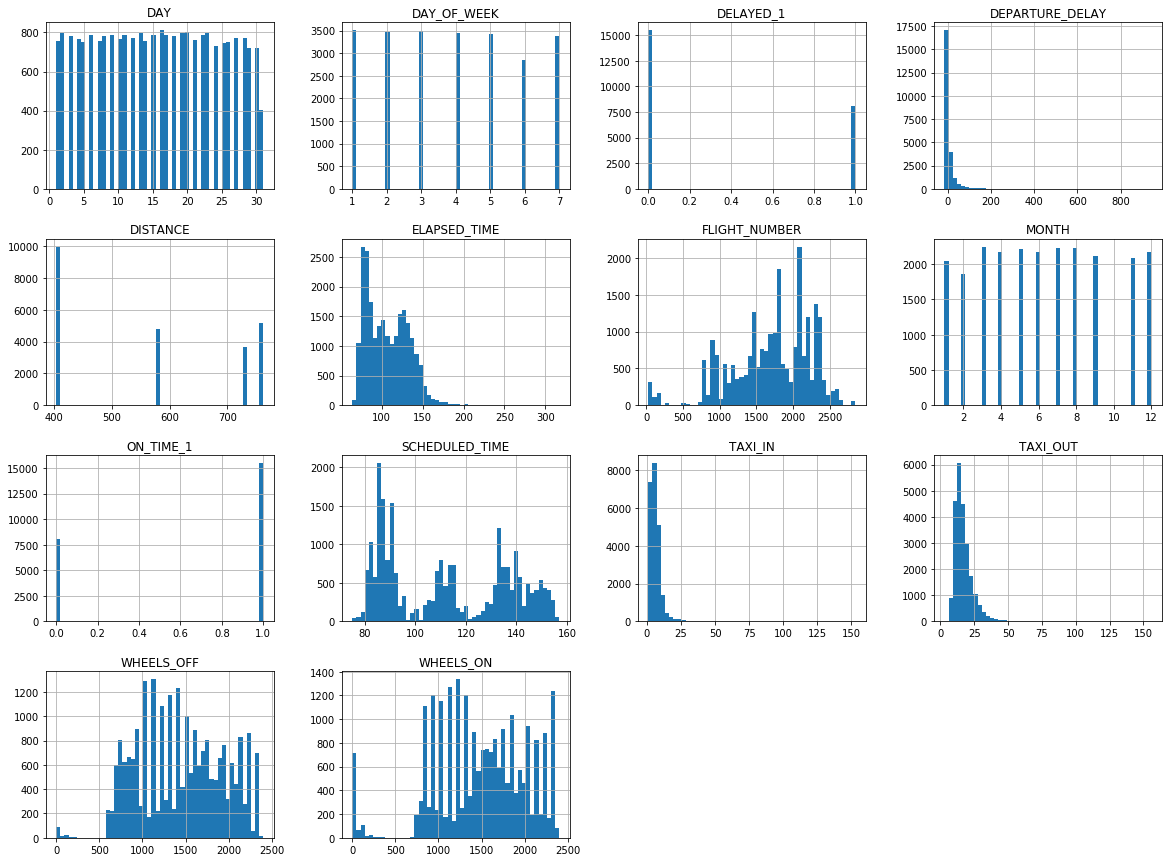

In [229]:
import matplotlib.pyplot as plt
data_7.hist(bins=50, figsize=(20,15))
plt.show()

# 11° correlaciones

In [230]:
data_7.columns.values
cols = data_7.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_8= data_7[cols]
data_8.columns.values


array(['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'DELAYED_1', 'ON_TIME_1'],
      dtype=object)

In [231]:
cols_de = cols[:-2] + ['DELAYED_1']
cols_on = cols[:-2] + ['ON_TIME_1']

data_ontime = data_8[cols_on] # base con la variable dep ontime 
data_delayed = data_8[cols_de] # base con la variable dep delayed

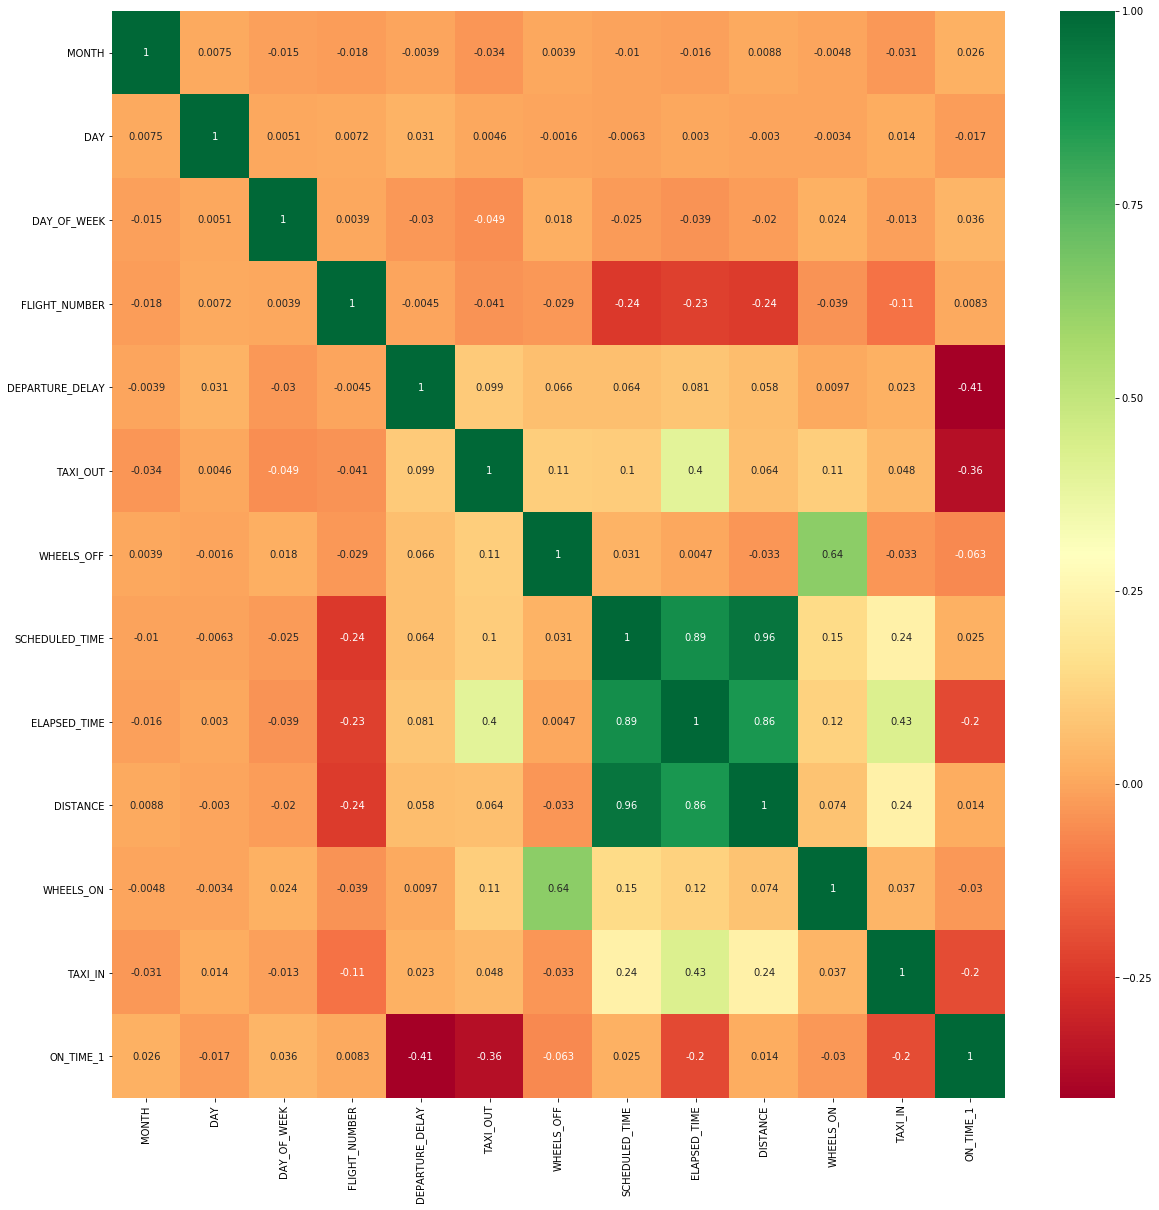

In [232]:
# correlation matrix
import seaborn as sns # ojo deben instalar seaborn en el ambiente de tensorflow 
import matplotlib.pyplot as plt

cols = cols[-1:] + cols[:-1]

X = data_ontime.iloc[:,0:19]  #independent columns
y = data_ontime.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data_ontime.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_ontime[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 12° enconding variables 

In [236]:
# Tranformar los dias a binarios
data_9 = data_8.copy() # hago una copia de la ultima base
# primero remplazo los numeros por el numbre de los meses para que las columnas lleven esos nombres
data_9.DAY_OF_WEEK = data_9.DAY_OF_WEEK.replace([1, 2, 3, 4, 5, 6, 7], ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Friday', 'Saturday', 'Sunday'])
data_9 = pd.get_dummies(data_9, columns=['DAY_OF_WEEK'])
#data_9.drop(Variables_Borradas_4,axis = 1, inplace = True)

# transformar los meses a binarios 
# hacemos lo mismo que en los dias 
data_9.MONTH = data_9.MONTH.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                      ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
data_9 = pd.get_dummies(data_9, columns=['MONTH'])

# transformar aeropuerto 
data_9 = pd.get_dummies(data_9, columns=['DESTINATION_AIRPORT'])



In [237]:
data_9.head()

,DATE,DAY,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,MONTH_Junio,MONTH_Marzo,MONTH_Mayo,MONTH_Noviembre,MONTH_Septiembre,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_FLL,DESTINATION_AIRPORT_LGA,DESTINATION_AIRPORT_MCO,DESTINATION_AIRPORT_TPA
729,2015-01-01,1,886,N918DL,2015-01-11 21:47:00,06:44:00,-1.0,31.0,715.0,128.0,...,0,0,0,0,0,0,0,1,0,0
815,2015-01-01,1,1818,N555NW,2015-01-13 08:45:00,06:54:00,-1.0,14.0,708.0,87.0,...,0,0,0,0,0,0,0,0,1,0
1439,2015-01-01,1,986,N924DL,2015-01-22 14:31:00,07:40:00,-5.0,32.0,812.0,130.0,...,0,0,0,0,0,0,0,1,0,0
1644,2015-01-01,1,2226,N820DN,2015-01-25 16:45:00,07:59:00,-1.0,15.0,814.0,110.0,...,0,0,0,0,0,0,1,0,0,0
2085,2015-01-01,1,2310,N930DL,2015-02-01 17:45:00,08:30:00,-2.0,14.0,844.0,153.0,...,0,0,0,0,0,1,0,0,0,0


In [238]:
data_10 = data_9.copy()
Variables_Borradas_10 =['FLIGHT_NUMBER',
       'TAIL_NUMBER'] # BORRADAS POR CANTIDAD DE MISSING VALUES
data_10.drop(Variables_Borradas_10, axis = 1, inplace = True)


In [244]:
data_10.head()

,DATE,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,...,MONTH_Junio,MONTH_Marzo,MONTH_Mayo,MONTH_Noviembre,MONTH_Septiembre,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_FLL,DESTINATION_AIRPORT_LGA,DESTINATION_AIRPORT_MCO,DESTINATION_AIRPORT_TPA
729,2015-01-01,1,2015-01-11 21:47:00,06:44:00,-1.0,31.0,715.0,128.0,137.0,762,...,0,0,0,0,0,0,0,1,0,0
815,2015-01-01,1,2015-01-13 08:45:00,06:54:00,-1.0,14.0,708.0,87.0,81.0,404,...,0,0,0,0,0,0,0,0,1,0
1439,2015-01-01,1,2015-01-22 14:31:00,07:40:00,-5.0,32.0,812.0,130.0,169.0,762,...,0,0,0,0,0,0,0,1,0,0
1644,2015-01-01,1,2015-01-25 16:45:00,07:59:00,-1.0,15.0,814.0,110.0,98.0,581,...,0,0,0,0,0,0,1,0,0,0
2085,2015-01-01,1,2015-02-01 17:45:00,08:30:00,-2.0,14.0,844.0,153.0,137.0,731,...,0,0,0,0,0,1,0,0,0,0


In [243]:
data_10.columns.values

array(['DATE', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'DELAYED_1', 'ON_TIME_1',
       'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Jueves', 'DAY_OF_WEEK_Lunes',
       'DAY_OF_WEEK_Martes', 'DAY_OF_WEEK_Miercoles',
       'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday', 'MONTH_Abril',
       'MONTH_Agosto', 'MONTH_Diciembre', 'MONTH_Enero', 'MONTH_Febrero',
       'MONTH_Julio', 'MONTH_Junio', 'MONTH_Marzo', 'MONTH_Mayo',
       'MONTH_Noviembre', 'MONTH_Septiembre', 'DESTINATION_AIRPORT_DFW',
       'DESTINATION_AIRPORT_FLL', 'DESTINATION_AIRPORT_LGA',
       'DESTINATION_AIRPORT_MCO', 'DESTINATION_AIRPORT_TPA'], dtype=object)

### División bases Data.
Se divide la base data en train y test 14 dias al test

In [279]:
data_11 = data_9.copy()
aux_train_all = data_11[data_11['DATE'] < '2015-12-17']
aux_test_all = data_11[data_11['DATE'] >= '2015-12-17']
# variables set delayed
col_de = data_11.columns.tolist()
col_de = col_de[:-24] + col_de[-23:]
# variables set ontime
col_on = data_11.columns.tolist()
col_on = col_on[:-25] + col_on[-24:]
cols_on = cols[:-2] + ['ON_TIME_1']
# creamos set delayed
aux_train_de = aux_train_all[col_de]
aux_test_de = aux_test_all[col_de]
# creamos set ontime


,DATE,DAY,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,MONTH_Junio,MONTH_Marzo,MONTH_Mayo,MONTH_Noviembre,MONTH_Septiembre,DESTINATION_AIRPORT_DFW,DESTINATION_AIRPORT_FLL,DESTINATION_AIRPORT_LGA,DESTINATION_AIRPORT_MCO,DESTINATION_AIRPORT_TPA
5587290,2015-12-17,17,786,N917DL,NaT,06:00:00,0.0,12.0,612.0,134.0,...,0,0,0,0,0,0,0,1,0,0
5588057,2015-12-17,17,886,N848DN,NaT,06:42:00,-3.0,18.0,700.0,133.0,...,0,0,0,0,0,0,0,1,0,0
5588128,2015-12-17,17,1818,N669DN,NaT,06:57:00,2.0,12.0,709.0,85.0,...,0,0,0,0,0,0,0,0,1,0
5588375,2015-12-17,17,2227,N6714Q,NaT,07:01:00,1.0,33.0,734.0,109.0,...,0,0,0,0,0,0,1,0,0,0
5588761,2015-12-17,17,1572,N906DA,NaT,07:27:00,2.0,20.0,747.0,83.0,...,0,0,0,0,0,0,0,0,0,1
5588989,2015-12-17,17,1243,N919DL,NaT,07:33:00,-2.0,10.0,743.0,150.0,...,0,0,0,0,0,1,0,0,0,0
5589111,2015-12-17,17,986,N847DN,NaT,08:38:00,53.0,14.0,852.0,135.0,...,0,0,0,0,0,0,0,1,0,0
5589180,2015-12-17,17,2118,N591NW,NaT,07:55:00,0.0,15.0,810.0,84.0,...,0,0,0,0,0,0,0,0,1,0
5589367,2015-12-17,17,2226,N694DL,NaT,08:01:00,1.0,12.0,813.0,107.0,...,0,0,0,0,0,0,1,0,0,0
5589699,2015-12-17,17,1472,N693DL,NaT,08:25:00,0.0,9.0,834.0,80.0,...,0,0,0,0,0,0,0,0,0,1
